<a href="https://colab.research.google.com/github/M4teoSandoval/Clase-Inteligencia-Artificiall/blob/main/EjemplosSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/diabetes.csv")
df


Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


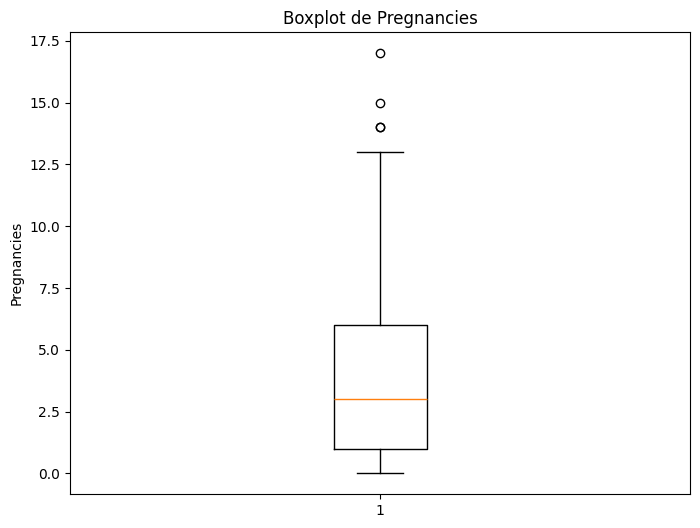

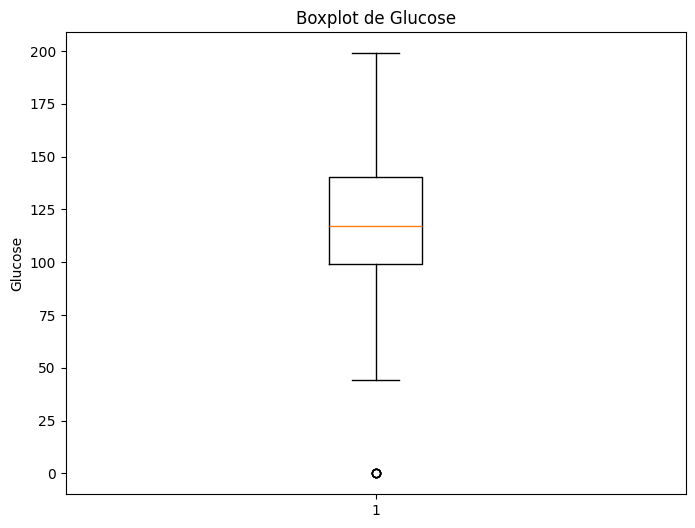

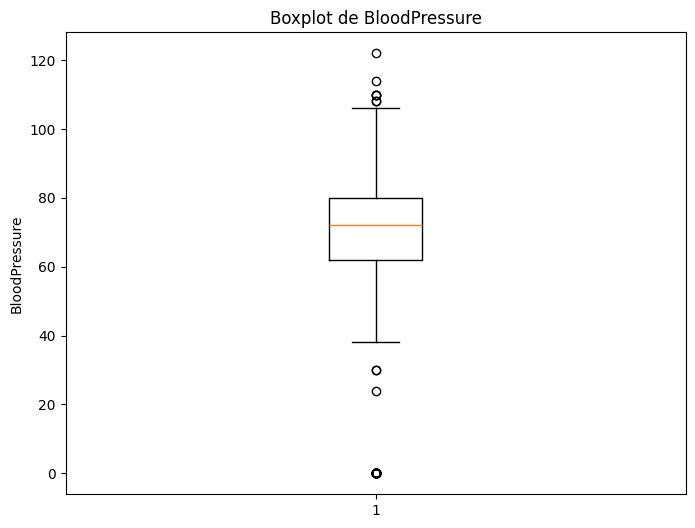

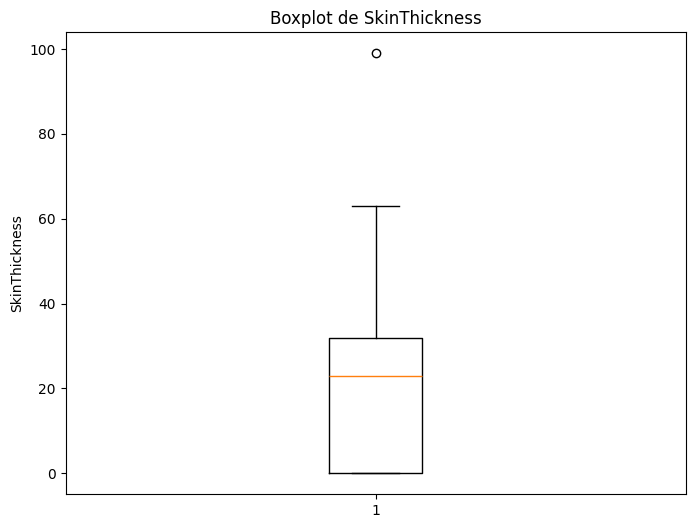

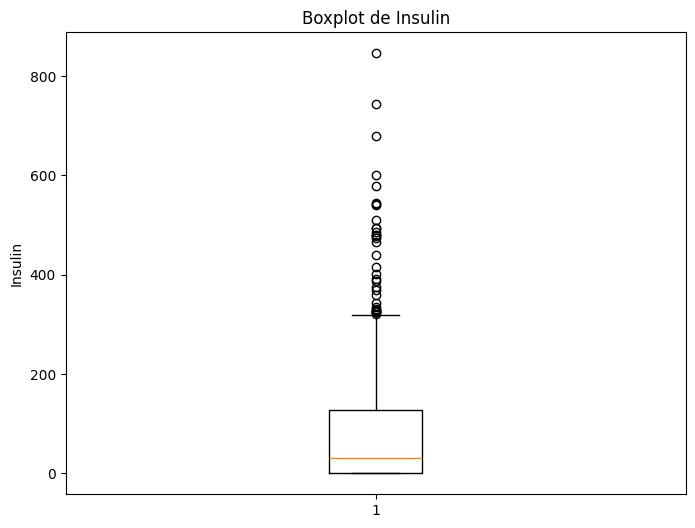

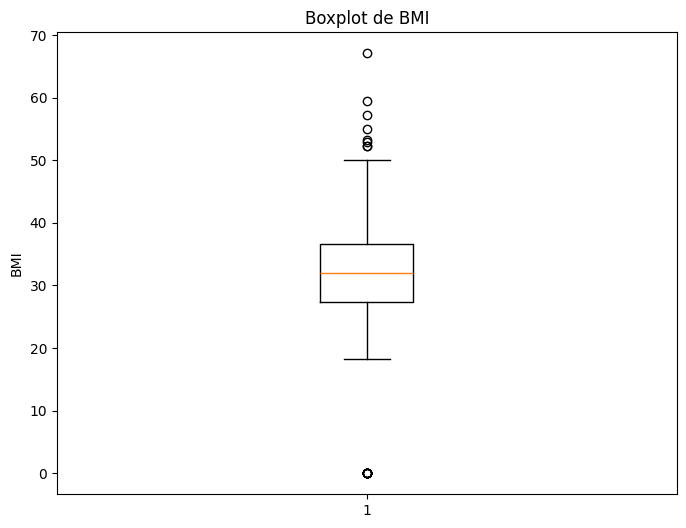

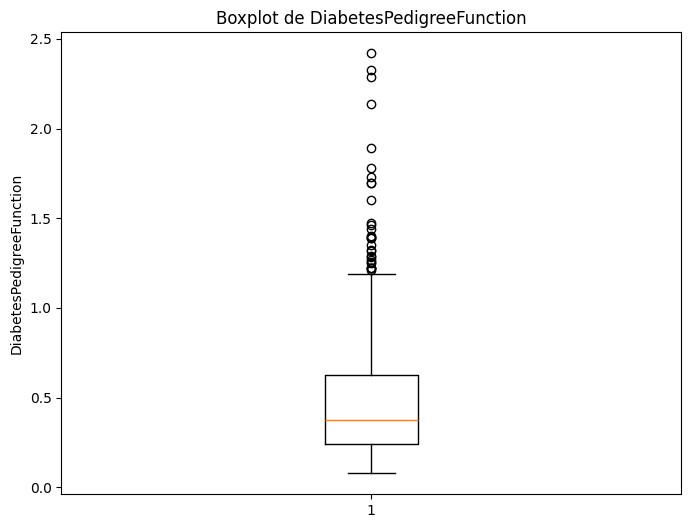

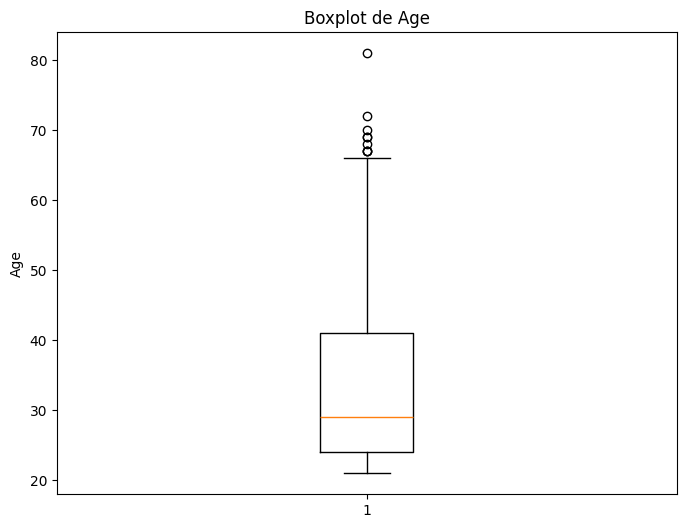

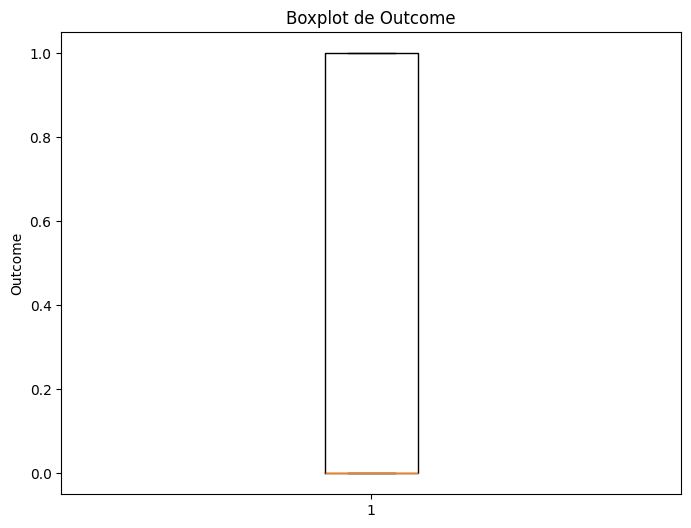

In [ ]:
# prompt: #Graficar caja de bigotes con cada una de los variables

import matplotlib.pyplot as plt

# Graficar caja de bigotes para cada variable numérica
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[column])
  plt.title(f"Boxplot de {column}")
  plt.ylabel(column)
  plt.show()


In [ ]:
#separar los datos de entrenamiento y de prueba y los datos etiquetados son outcomes

from sklearn.model_selection import train_test_split

# Separar los datos en características (X) y etiquetas (y)
X = df.drop('Outcome', axis=1)  # Todas las columnas excepto 'Outcome'
y = df['Outcome']  # La columna 'Outcome'

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las formas de los conjuntos de datos para verificar la separación
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (614, 8)
Forma de X_test: (154, 8)
Forma de y_train: (614,)
Forma de y_test: (154,)


In [ ]:
stratify = y_train
stratify

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


#Normalizar los feactures de entrenamiento

In [ ]:
# prompt: normalice los datos de entrenamiento y prueba usando minmax

from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler a los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el scaler ajustado con los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados a un DataFrame de pandas (opcional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Imprimir las primeras filas de los datos escalados para verificar
print("Datos de entrenamiento escalados:")
print(X_train_scaled_df.head())

print("\nDatos de prueba escalados:")
print(X_test_scaled_df.head())


Datos de entrenamiento escalados:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.422111       0.000000       0.000000  0.000000  0.000000   
1     0.529412  0.562814       0.672131       0.380952  0.000000  0.420268   
2     0.058824  0.698492       0.377049       0.301587  0.098109  0.427720   
3     0.000000  0.809045       0.409836       0.000000  0.000000  0.326379   
4     0.352941  0.673367       0.655738       0.587302  0.437352  0.688525   

   DiabetesPedigreeFunction       Age  
0                  0.096499  0.000000  
1                  0.514091  0.483333  
2                  0.245944  0.016667  
3                  0.075149  0.733333  
4                  0.068318  0.416667  

Datos de prueba escalados:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.492462       0.475410       0.523810  0.224586  0.506706   
1     0.117647  0.562814       0.614754       0.507937  0.000000  0.53204

In [38]:
# prompt: entrenar con svc los feactures y la etiqueta

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear un modelo SVC
svc_model = SVC(C=.5,kernel='linear')

# Entrenar el modelo con los datos de entrenamiento escalados
svc_model.fit(X_train_scaled, y_train)

# Realizar predicciones en los datos de prueba escalados
y_pred = svc_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVC: {accuracy}")


Precisión del modelo SVC: 0.7922077922077922


In [40]:
# prompt: Realizar inferencias del modelo de SVC usando gridSearch usando c de 0.5 a 5 con pasos de 1 y kernell linear’, ‘poly’, ‘rbf’

from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'C': [0.5, 1.0,1.5,2,2.5, 3,3.5, 4,4.5, 5],
    'kernel': ['linear', 'poly', 'rbf']
}

# Crear un modelo SVC
svc_model = SVC()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntaje: {best_score}")

# Crear un modelo SVC con los mejores parámetros
best_svc_model = SVC(**best_params)

# Entrenar el modelo con los mejores parámetros
best_svc_model.fit(X_train_scaled, y_train)

# Realizar predicciones en los datos de prueba
y_pred = best_svc_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVC con los mejores parámetros: {accuracy}")


Mejores parámetros: {'C': 3, 'kernel': 'linear'}
Mejor puntaje: 0.767119818739171
Precisión del modelo SVC con los mejores parámetros: 0.7597402597402597
